<a href="https://colab.research.google.com/github/beelittlehoney/CCMACLRL_PROJECT_COM222/blob/main/CCMACLRL_PROJECT_COM222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/beelittlehoney/CCMACLRL_PROJECT_COM222/refs/heads/main/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Select Features and Target

In [2]:
X = df.drop('price', axis=1)
X

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [3]:
y = df['price']
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


# Preprocessing Categorical and Numerical Features

In [4]:
categorical_features = ['cut', 'color', 'clarity']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

categorical_features, numerical_features

(['cut', 'color', 'clarity'],
 ['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z'])

# OneHotEncoder and StandardScaler Application

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_features),
        ('categorical', OneHotEncoder(), categorical_features)
    ]
)

# Splitting the Data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

### Train the Model

In [8]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Unnamed: 0', 'carat',
                                                   'depth', 'table', 'x', 'y',
                                                   'z']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('regressor', LinearRegression())])

### Prediction

1. Applying the Model to make a Prediction

In [9]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

2. Checking the application of the Model

In [10]:
y_train_pred

array([14025.34512393,  4545.46091418,  6259.88804446, ...,
        1723.72692784,  2386.39008157,  6752.84110727])

In [11]:
y_test_pred

array([ 508.31603663, 3300.12577851, 1985.5312597 , ...,  852.03132042,
       8710.98193747, 2980.6344271 ])

### Evaluate the Model

1. Evaluation

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

lr_model_train_mse = mean_squared_error(y_train, y_train_pred)
lr_model_train_r2 = r2_score(y_train, y_train_pred)

lr_model_test_mse = mean_squared_error(y_test, y_test_pred)
lr_model_test_r2 = r2_score(y_test, y_test_pred)

2. Print Results

In [13]:
print("Model Train MSE:", lr_model_train_mse)
print("Model Train R2:", lr_model_train_r2)
print("Model Test MSE:", lr_model_test_mse)
print("Model Test R2:", lr_model_test_r2)

Model Train MSE: 1268160.9274522883
Model Train R2: 0.920340343026562
Model Test MSE: 1282237.9409818375
Model Test R2: 0.9193399796988827


3. Visualize Results

In [14]:
lr_model_results = pd.DataFrame(['Linear Regression',
                              lr_model_train_mse,
                              lr_model_train_r2,
                              lr_model_test_mse,
                              lr_model_test_r2]).transpose()
lr_model_results.columns = ['Model', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [15]:
lr_model_results

,Model,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1268160.927452,0.92034,1282237.940982,0.91934


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))])

### Train the Model

In [17]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Unnamed: 0', 'carat',
                                                   'depth', 'table', 'x', 'y',
                                                   'z']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, random_state=42))])

### Prediction

In [18]:
y_rf_train_pred = rf_model.predict(X_train)
y_rf_test_pred = rf_model.predict(X_test)

### Evaluate the Model

1. Evaluation

In [19]:
rf_model_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_model_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_model_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_model_test_r2 = r2_score(y_test, y_rf_test_pred)

2. Print Results

In [20]:
print("Model Train MSE:", rf_model_train_mse)
print("Model Train R2:", rf_model_train_r2)
print("Model Test MSE:", rf_model_test_mse)
print("Model Test R2:", rf_model_test_r2)

Model Train MSE: 1521.2846548767968
Model Train R2: 0.9999044403504768
Model Test MSE: 1773.7042216418783
Model Test R2: 0.9998884239703465


3. Visualize Results

In [21]:
rf_model_results = pd.DataFrame(['Random Forest',
                              rf_model_train_mse,
                              rf_model_train_r2,
                              rf_model_test_mse,
                              rf_model_test_r2]).transpose()
rf_model_results.columns = ['Model', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [22]:
rf_model_results

,Model,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1521.284655,0.999904,1773.704222,0.999888


## Model Comparison

In [23]:
df_model = pd.concat([lr_model_results, rf_model_results], axis=0).reset_index(drop=True)
df_model.sort_values(by='Test MSE', ascending=True)

,Model,Training MSE,Training R2,Test MSE,Test R2
1,Random Forest,1521.284655,0.999904,1773.704222,0.999888
0,Linear Regression,1268160.927452,0.92034,1282237.940982,0.91934


## Data Visualization of Prediction Results

Text(0.5, 1.0, 'Actual Price vs. Predicted Prices')

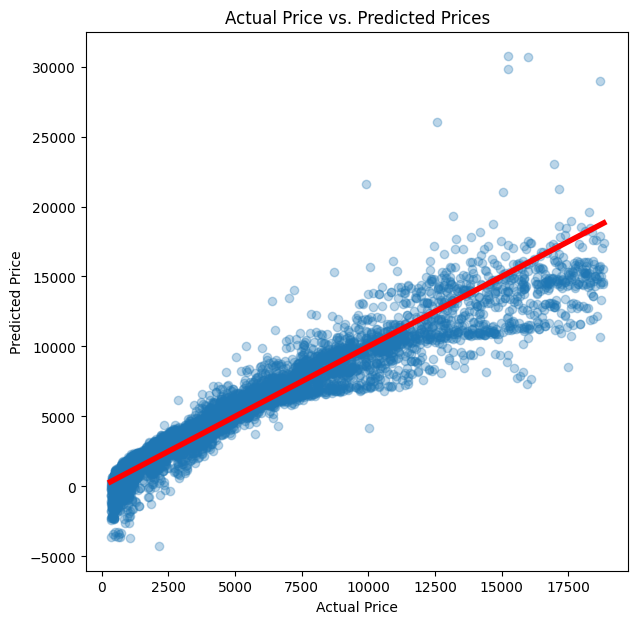

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', lw=4)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Prices')